<a href="https://colab.research.google.com/github/chetana2003/OIBSIP-MARCH-DA-/blob/main/Credit_Card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import log_loss, roc_auc_score,f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, RepeatedStratifiedKFold,StratifiedKFold
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer
from sklearn.decomposition import PCA

In [ ]:
import xgboost as xgb
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data Analytics/creditcard.csv")

In [ ]:
target = "Class" #Target column that we will be predicting, this is here for quick reference

# Feature engineering and model training options
EPOCHS= 100

# Notebook settings
sns.set_style("darkgrid")
pd.set_option('mode.chained_assignment',None)

In [ ]:
print("First the values of the Target Class")
display(df[target].value_counts())

First the values of the Target Class


0    284315
1       492
Name: Class, dtype: int64

In [ ]:
print("Unique datatypes:\n",df.dtypes.unique())

Unique datatypes:
 [dtype('float64') dtype('int64')]


In [ ]:
print("Column information:\n")
df.info()

Column information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  fl

In [ ]:
df[target].unique()

array([0, 1])

In [ ]:
kurtosis_df = df.drop(target,axis =1).kurtosis().sort_values()
print("Tailed columns by kurtosis value\n")
display(kurtosis_df)

Tailed columns by kurtosis value



Time       -1.293530
V13         0.195300
V15         0.284769
V24         0.618871
V26         0.919006
V11         1.633921
V19         1.724970
V18         2.578341
V4          2.635455
V22         2.832967
V9          3.731311
V25         4.290412
V16        10.419131
V12        20.241870
V14        23.879462
V3         26.619551
V10        31.988239
V1         32.486679
V6         42.642494
V17        94.799719
V2         95.773106
V5        206.904560
V21       207.287040
V8        220.586974
V27       244.989241
V20       271.016113
V7        405.607417
V23       440.088659
Amount    845.092646
V28       933.397502
dtype: float64

In [ ]:
non_dist_cols =[col for col in df.columns if col not in ["Time","V4", "V9","V11","V13","V15","V18","V19","V22","V24","V25","V26","Class"]]

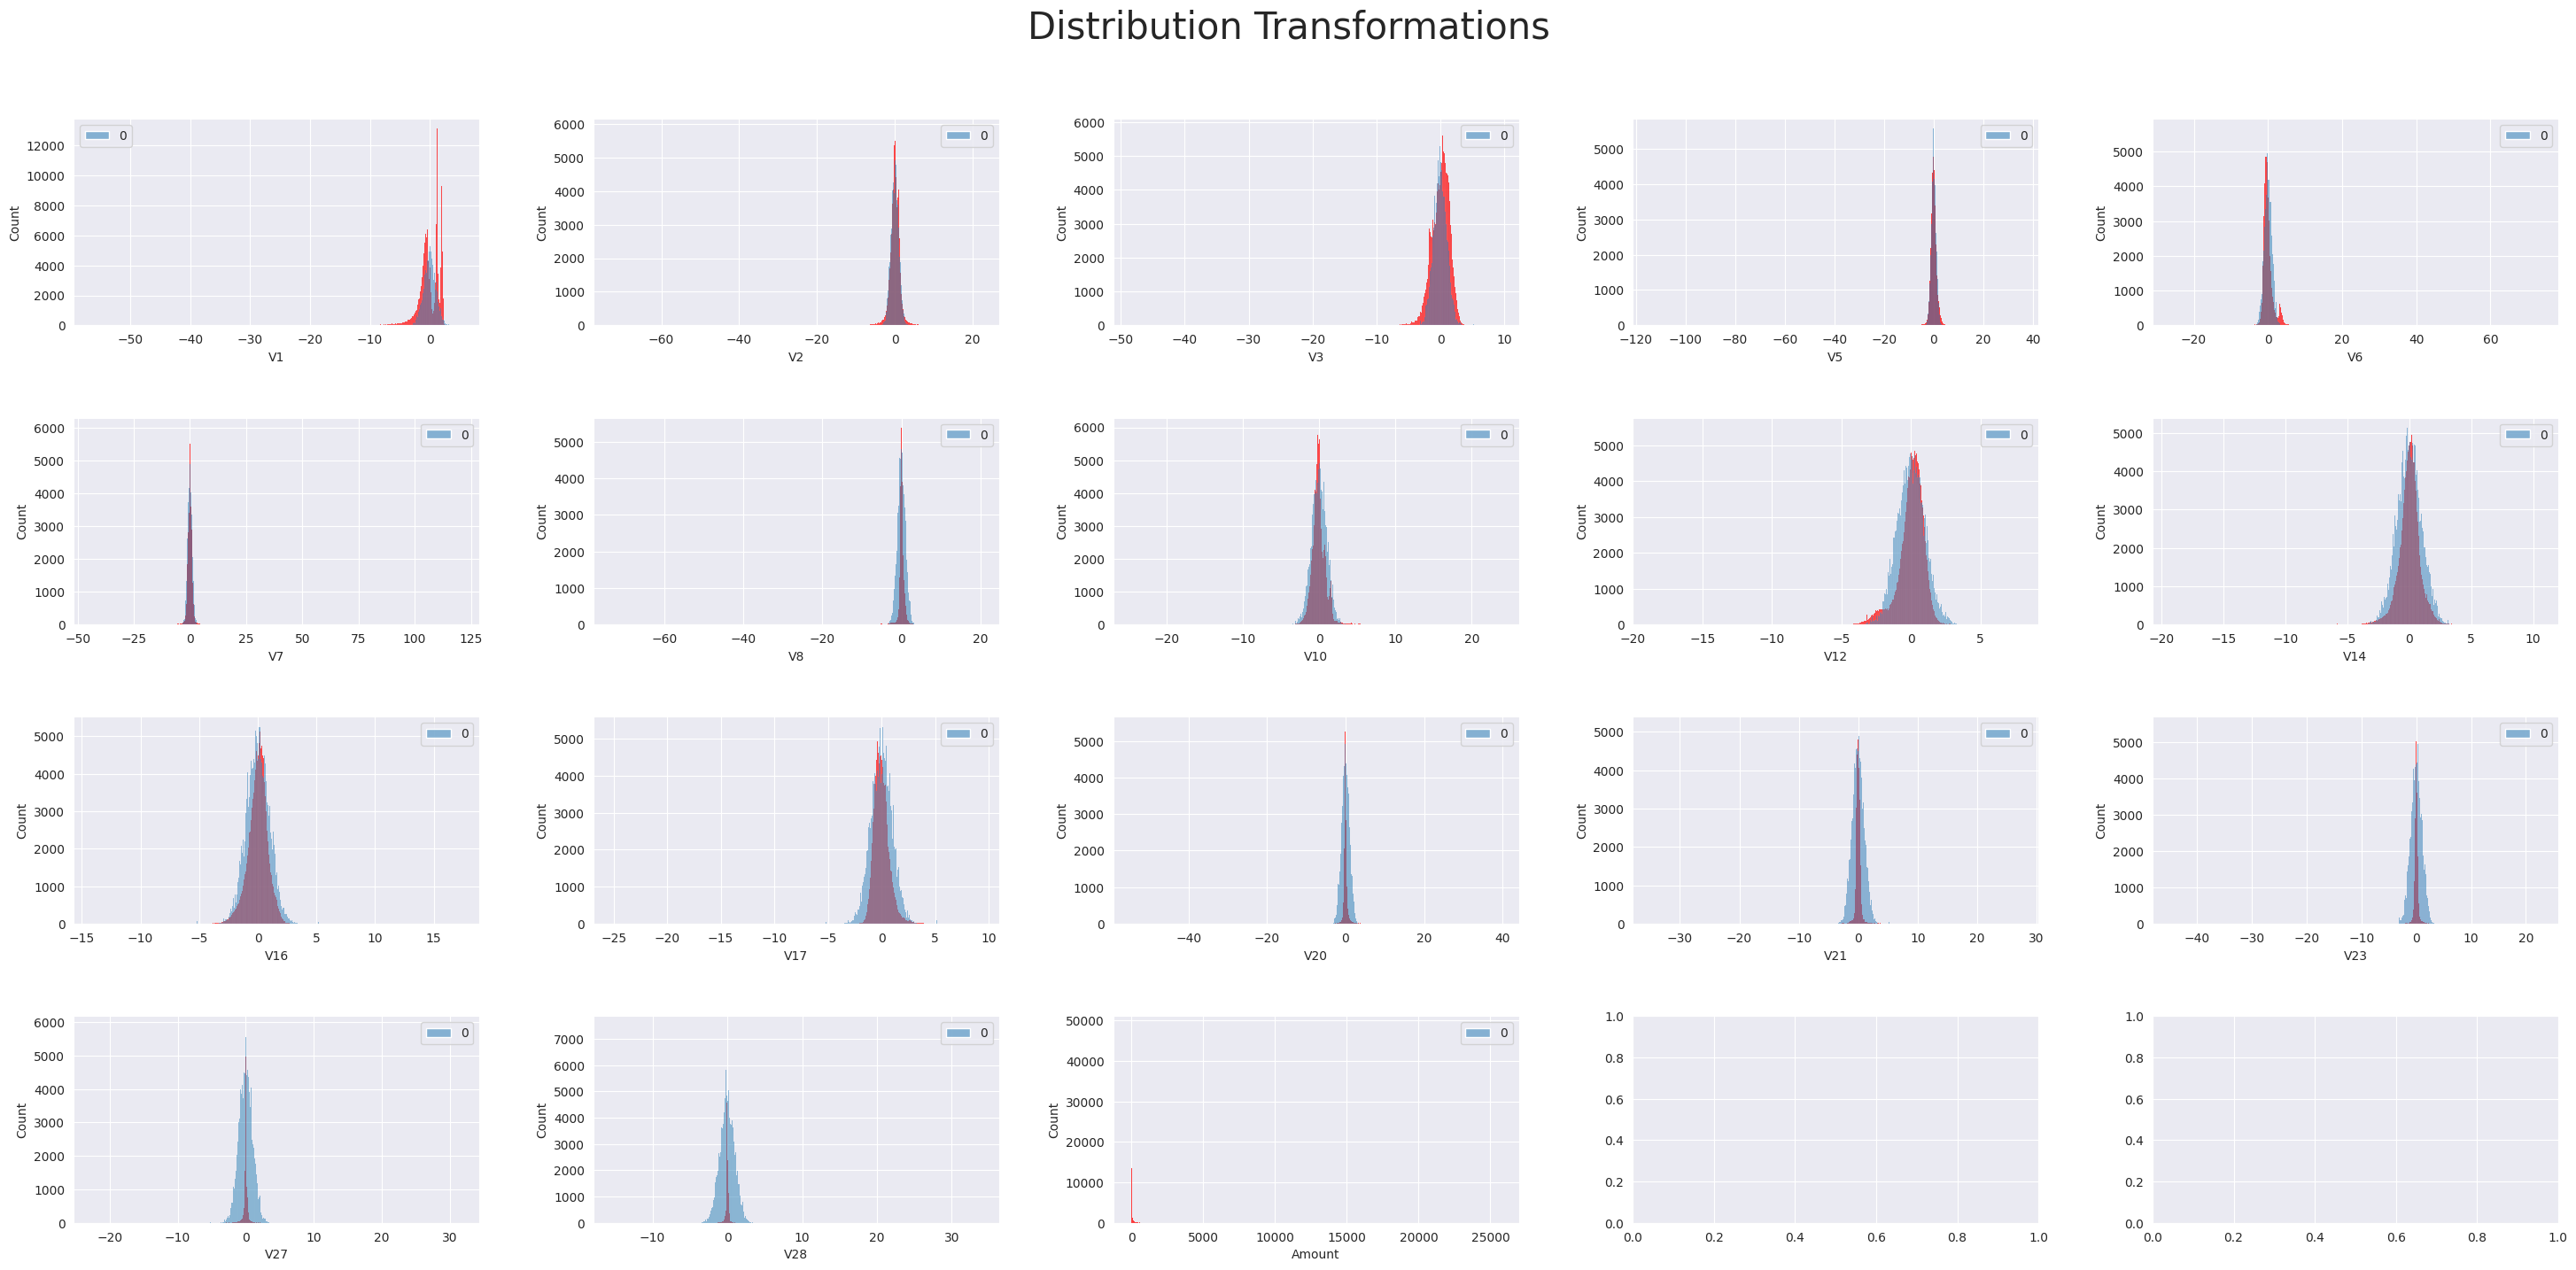

In [ ]:
fig,ax = plt.subplots(round(len(non_dist_cols)/5),5, figsize = (30,15))
ax = np.ravel(ax)
for i,col in enumerate(non_dist_cols):
    scaler = QuantileTransformer(output_distribution="normal")
    quant_df = scaler.fit_transform(df[[col]])
    sns.histplot(x= df[col],ax= ax[i], color = "r")
    sns.histplot(quant_df,ax= ax[i])
    ax[i].set_title("")
plt.suptitle("Distribution Transformations",fontsize = 30)
plt.tight_layout(pad = 4)
plt.show()

In [ ]:
df_trn = df.copy(deep = True)

In [ ]:
df_trn.drop_duplicates(inplace = True,ignore_index  = True)
print(df_trn.duplicated().sum())

0


In [ ]:
df[target].value_counts()/len(df[target])

0    0.998273
1    0.001727
Name: Class, dtype: float64